Linear Regression:

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [54]:
#Importing Libraries:

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [55]:
# Reading the data:

url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [56]:
# Exploring the data:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [57]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [58]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


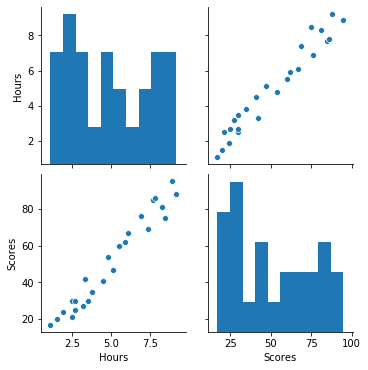

In [59]:
 sns.pairplot(df)

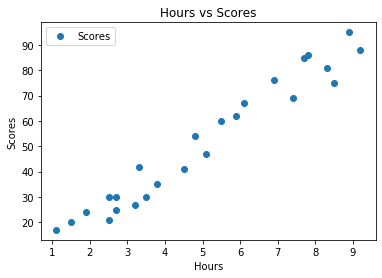

In [60]:
# Plotting the entire data set:

df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.show()

From the graph above, we can clearly see that there is a linear relation between the number of Hours and Scores.

In [61]:
X=df['Hours']
y=df['Scores']

In [62]:
from sklearn.model_selection import train_test_split  

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [65]:
X_train

22    3.8
5     1.5
2     3.2
12    4.5
15    8.9
3     8.5
4     3.5
20    2.7
17    1.9
21    4.8
18    6.1
24    7.8
7     5.5
10    7.7
14    1.1
19    7.4
6     9.2
Name: Hours, dtype: float64

In [66]:
X_train.values.reshape(-1,1)

array([[3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [67]:
lm.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
print(lm.intercept_)
print(lm.coef_)

2.794196676599803
[9.71054094]


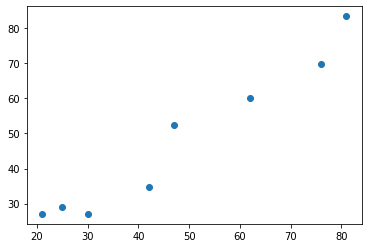

In [69]:
predictions = lm.predict(X_test.values.reshape(-1,1))
plt.scatter(y_test,predictions)

In [73]:
 Predicting the scores:

y_pred =lm.predict(X_test.values.reshape(-1,1)) # Predicting the scores

In [71]:
# Comparing Actual Data vs Predicted Data:

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
8,81,83.391686
16,30,27.070549
0,21,27.070549
23,76,69.796929
11,62,60.086388
9,25,29.012657
13,42,34.838982
1,47,52.317955


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [74]:
from sklearn import metrics  

In [81]:
metrics.mean_absolute_error(y_test,y_pred)

4.499999999999998

In [82]:
metrics.mean_squared_error(y_test,y_pred)

23.61945761415174

In [83]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

4.859985351228103

In [84]:
metrics.r2_score(y_test,y_pred)

0.9487647340257012